# Individual Project Planning Stage

In [33]:
library(tidyverse)
library(repr)
library(tidymodels)

In [34]:
players_data <- read_csv("data/players.csv")
#players_data

#age_range <- players_data |> summarize(min_val = min(Age, na.rm = TRUE),
                                     #  max_val = max(Age, na.rm = TRUE))
#hours_range <- players_data |> summarize(min_val = min(played_hours, na.rm = TRUE),
                                        # max_val = max(played_hours, na.rm = TRUE))

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [35]:
sessions_data <- read_csv("data/sessions.csv")
# sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Players.csv: 196 observations, 7 variable

Experience (categorical):
- pro, veteran, amateur, regular, beginner 
- class and mode: characters
                                    
Subscribe (categorical):
- subscribed to game-related newsletter or not
- mode: logical (52 "FALSE", 144 "TRUE")
                                   
Hashed email (categorical): 
- encrypted email of player
- class and mode: characters 
                                      
Hours played (numerical):
- 0 to 223.1 hours
- minimum: 0.000, 1st quartile: 0.000, median: 0.100, mean: 5.846, 3rd quartile: 0.600, maximum: 223.100
                                    
Name (categorical):
- class and mode: characters
                              
Gender (categorical):
- male, female, non-binary, two-spirited, agender, other
- class and mode: characters 
                                
Age (numerical):
- 8 to 50
- minimum: 8.00, 1st quartile: 17.00, median: 19.00, mean: 20.52, 3rd quartile: 22.00, maximum: 50.00, 2 NA's

Sessions.csv: 1535 observations, 5 variables

Hashed email (categorical):
- encrypted email of player
- class and mode: characters (1535 observations)

start_time (numerical):
- start for session
- class and mode: characters (1535 observations)

end_time (numerical):
- end for session
- class and mode: characters (1535 observations)

original_start_time and original_end_time (numerical):
- original start for session / original end for session
- minimum: 1.712e+12, 1st quartile: 1.716e+12, median: 1.719e+12, mean: 1.719e+12, 3rd quartile: 1.722e+12, maximum: 1.727e+12


Issues:
- Missing data may make understanding target demographic(s) difficult if characteristics/behaviours are affected.
- Should tidy up data and change formatting of dataset so it's easier to apply functions.

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Can the age and number of hours played predict the subscription status of a player in the players dataset?

The dataset will need to be wrangled. I can filter it to just include the columns of interest (age, played_hours and subscribe) by using select(). The data shows one variable for each column, so I won't use pivot_wider()/pivot_longer(). Group_by() and summarize() will be used to perform summary statistics. To find trends I will use arrange() to sort in descending order. I will use regression to predict subscription status. The values in "subscribe" are categorical, so I will use mutate() and as_factor() convert into a factor. I will use fct_recode() to change "TRUE" and "FALSE" to "subscribed" and "not subscribed".

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


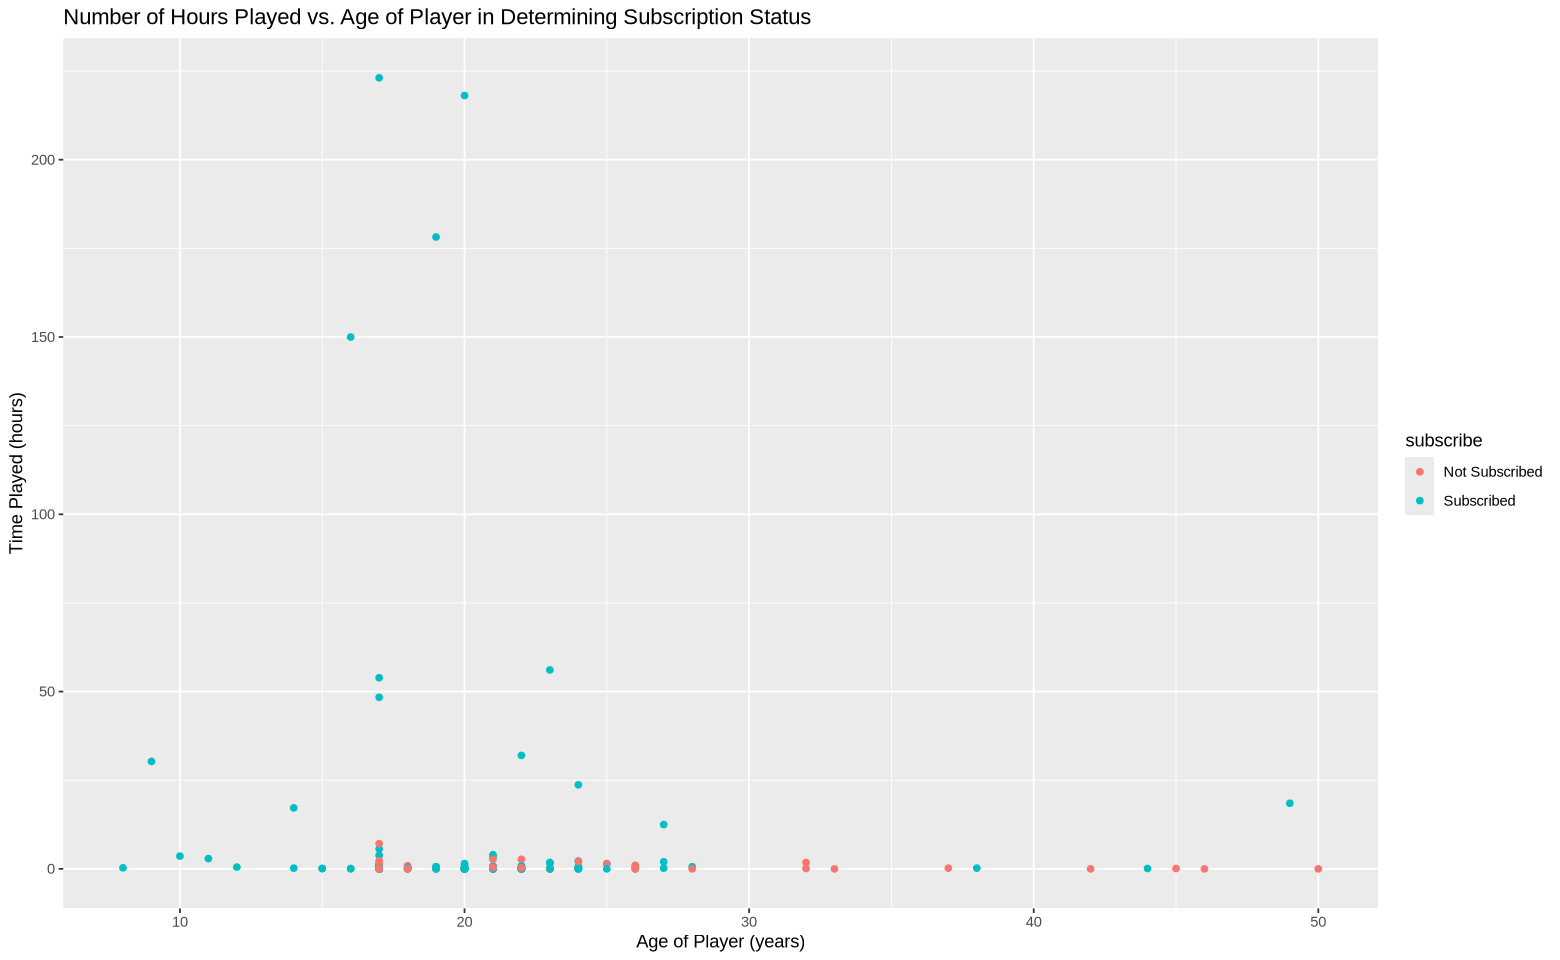

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


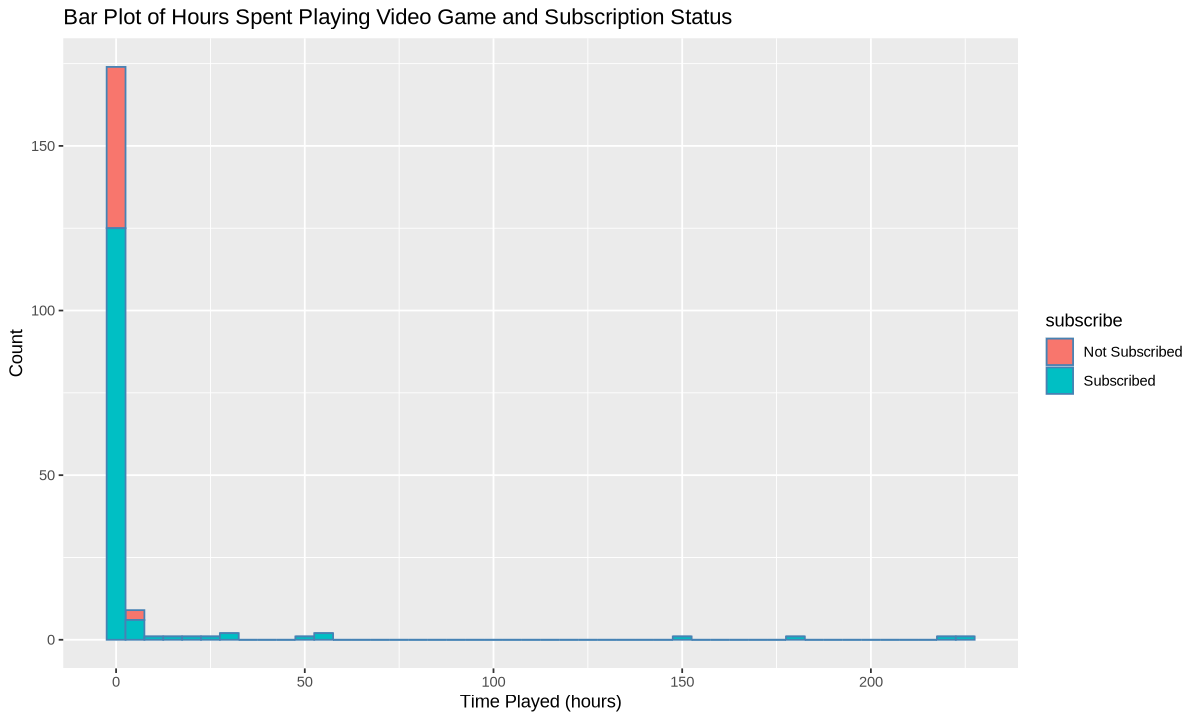

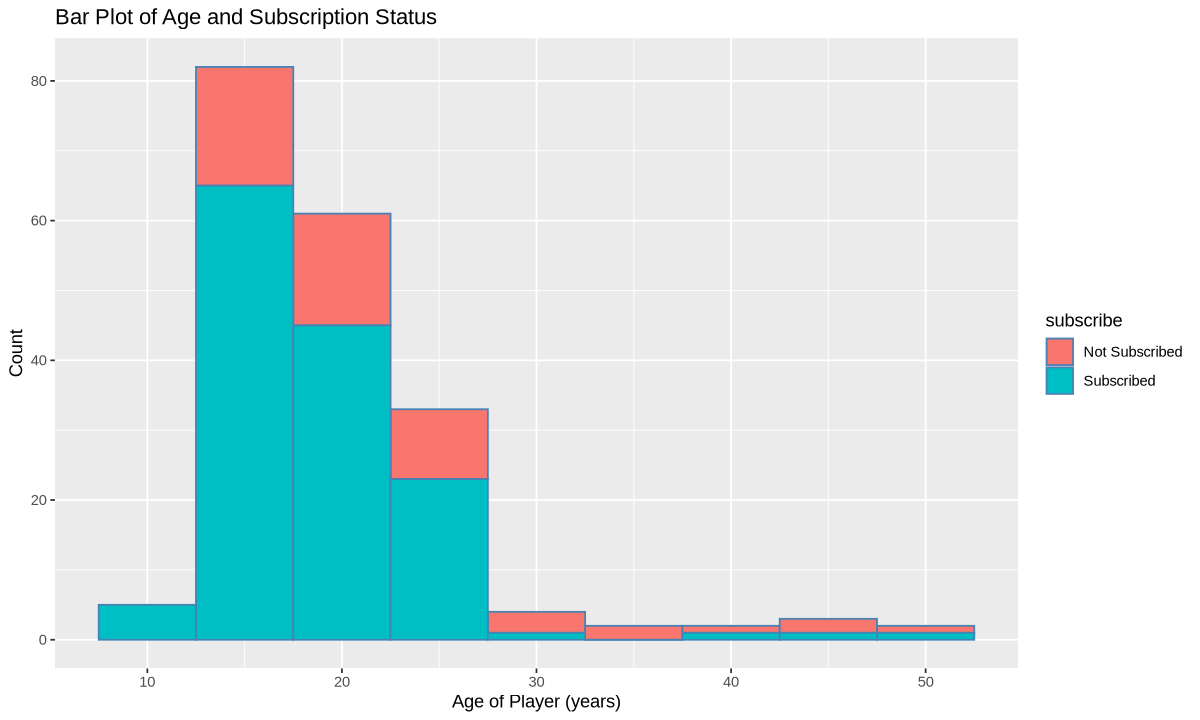

In [38]:
players_wrangled <- players_data |>
                        select(Age, subscribe, played_hours) |>
                        mutate(played_hours = as.numeric(played_hours)) |>
                        mutate(subscribe = as_factor(subscribe)) |>
                        mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not Subscribed" = "FALSE"))

# players_wrangled

mean_values <- players_wrangled |>
                summarize(mean_played_hours = mean(played_hours, na.rm = TRUE), mean_age = mean(Age, na.rm = TRUE))
mean_values

options(repr.plot.width=13, repr.plot.height=8)
players_plot <- ggplot(players_wrangled, aes(x = Age, y = played_hours, color = subscribe)) +
                    geom_point() +
                    labs(x = "Age of Player (years)", y = "Time Played (hours)", title = "Number of Hours Played vs. Age of Player in Determining Subscription Status")
players_plot


options(repr.plot.width=10, repr.plot.height=6)
played_hours_plot <- ggplot(players_wrangled, aes(x = played_hours, fill = subscribe)) +
                        geom_histogram(binwidth = 5, color = "steelblue") +
                        labs(title = "Bar Plot of Hours Spent Playing Video Game and Subscription Status", x = "Time Played (hours)", y = "Count")
played_hours_plot

options(repr.plot.width=10, repr.plot.height=6)
age_plot <- ggplot(players_wrangled, aes(x = Age, fill = subscribe)) +
                        geom_histogram(binwidth = 5, color = "steelblue") +
                        labs(title = "Bar Plot of Age and Subscription Status", x = "Age of Player (years)", y = "Count")
age_plot

Scatter plot doesn't give a lot of insight due to the scale. There are some values significantly higher than others, so differences (can be less than 0.5 hours) aren't easily determined on this scale (axis division/grid difference should be smaller).

Bar plot (played_hours) shows number of players in each bin, filled based on subscription. We can determine which group is most likely to subscribe to a newsletter based on number of hours played. I would manipulate the dataset more in the future so that the bar graph is easier to read—I could filter out any values that are equal to 0 as they wouldn't give data helpful for predictions.

Bar plot (Age) shows number of players in each bin, filled based on subscription. It's clear and helps determine which age group is most likely to subscribe to a game-related newsletter. I can see how age affects subscription and determine what age group to focus promotion efforts.

In order to address my question of interest, I think the best model is a linear regression model. The prediction is a categorical variable (subscribed or not subscribed) and we are trying to determine the probability of subscription based on two explanatory variables. We would also be able to get coefficients that would further help in determining the influence on the predicted outcome. Some of the assumptions I would be making would include assuming there is a linear relationship between the variables, both explanatory variables don't influence each other (independent of each other), and that there aren't outliers in the data that could skew results. Linear regression also has some limitations. Since linear regression is a simpler model, I need to be mindful of underfitting the dataset, preprocessing the data well enough that any extreme outliers don't disproportionately affect my outcomes, and that linearity is important for this model (I may have to change my model to k-nn regression, etc. if the variables don't show a linear relationship).  I will perform a linear regression and k-nn regression (and tune neighbours) and determine the accuracy of both models to select which will perform better based on my needs (whether I would prefer higher precision or recall). I would split the data into 2 sets (training + testing) with a 70% training and 30% testing. I will also use cross-validation to perform at least 5 cross-validations (k = 5) to reduce chances of over/underfitting. Once I have created the model based on my training set, I will then test on my testing set to see the accuracy and determine if the model is good for predicting unknown values.